# 데이터 시각화 연습문제 (2) - 서브플롯

아래의 데이터는 `2020년 02월 05일`부터 `2023년 05월 31일`까지 서울시와 전국에 대한 코로나19의 누적 확진자, 일일 확진자, 누적 사망자에 대한 조사자료 일부이다.

| 서울시 기준일    | 서울 확진자  | 서울시 일일 확진 | 서울시 사망 | 전국 확진    | 전국 일일 확진 | 전국 사망 |
|------------|---------|-----------|--------|----------|----------|-------|
| 2023-05-31 | 6204277 | 5987      | 6492   | 31703511 | 24411    | 34784 |
| 2023-05-30 | 6198290 | 3326      | 6486   | 31679100 | 13529    | 34767 |
| 2023-05-29 | 6194964 | 1393      | 6485   | 31665571 | 6868     | 34760 |
| 2023-05-28 | 6194964 | 1393      | 6485   | 31665571 | 6868     | 34760 |
| 2023-05-27 | 6191196 | 4078      | 6485   | 31647238 | 17796    | 34784 |

전체 데이터는 아래의 URL에서 확인할 수 있다.

> https://data.hossam.kr/D01/covid19.xlsx

## 그래프 요구사항

아래의 내용을 모두 반영한 그래프를 생성하세요.

사용자로부터 날짜를 yyyymmdd의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.
2행 1열의 서브플롯을 만들고 각각의(!!!) 그래프 영역에 대한 twinx를 생성하시오.
첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
누적 확진자는 y축을 왼쪽으로 설정한 막대그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프(날짜에 따른 변동추이)로 생성해야 합니다.
seaborn을 활용하여 구현하세요.
아래의 예시와 최대한 비슷하게 구현하면 됩니다.



> 그래프 출처: 질병관리청 (https://ncov.kdca.go.kr/bdBoardList_Real.do)

In [194]:
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel, pivot_table
import numpy as np
import seaborn as sb
from datetime import datetime, timedelta

In [67]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['axes.unicode_minus'] = False

In [179]:
df1 = read_excel('https://data.hossam.kr/D01/covid19.xlsx')
df1 = df1.sort_index(ascending=False)
df1

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
1211,2020-02-05,8,0.0,0,18.0,0.0,0
1210,2020-02-06,11,0.0,0,24.0,0.0,0
1209,2020-02-07,10,0.0,0,24.0,0.0,0
1208,2020-02-08,10,0.0,0,24.0,0.0,0
1207,2020-02-09,10,0.0,0,27.0,0.0,0
...,...,...,...,...,...,...,...
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767


사용자로부터 날짜를 yyyymmdd의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.
2행 1열의 서브플롯을 만들고 각각의(!!!) 그래프 영역에 대한 twinx를 생성하시오.

첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

누적 확진자는 y축을 왼쪽으로 설정한 막대그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프(날짜에 따른 변동추이)로 생성해야 합니다.

seaborn을 활용하여 구현하세요.
아래의 예시와 최대한 비슷하게 구현하면 됩니다.

In [180]:
# 열단위 필터링
f1 = df1.filter(['서울시 기준일','서울 확진자','서울시 일일 확진','전국 확진','전국 일일 확진'])
f1
f2 = f1.rename(
    columns={'서울시 기준일':'서울시기준일','서울 확진자':'서울확진자','서울시 일일 확진':'서울시일일확진','전국 확진':'전국확진','전국 일일 확진':'전국일일확진'},
)
f2

,서울시기준일,서울확진자,서울시일일확진,전국확진,전국일일확진
1211,2020-02-05,8,0.0,18.0,0.0
1210,2020-02-06,11,0.0,24.0,0.0
1209,2020-02-07,10,0.0,24.0,0.0
1208,2020-02-08,10,0.0,24.0,0.0
1207,2020-02-09,10,0.0,27.0,0.0
...,...,...,...,...,...
4,2023-05-27,6191196,4078.0,31647238.0,17796.0
3,2023-05-28,6194964,1393.0,31665571.0,6868.0
2,2023-05-29,6194964,1393.0,31665571.0,6868.0
1,2023-05-30,6198290,3326.0,31679100.0,13529.0


In [216]:
# 조건값을 변수로 적용하기
# point = input('날짜를 입력하세용: ')
date = '2022-07-13'
day_1 = '2021-01-01'
day_7 = '2021-01-09'
#day_1 = datetime.strptime('20230111','%Y-%m-%d')
#print(day_1)
#day_7 = date + timedelta(days=7)
df = f2.query('서울시기준일 > @day_1 and 서울시기준일 < @day_7')
df

,서울시기준일,서울확진자,서울시일일확진,전국확진,전국일일확진
879,2021-01-02,19614,251.0,62593.0,824.0
878,2021-01-03,19809,197.0,63244.0,657.0
877,2021-01-04,20138,329.0,64264.0,1020.0
876,2021-01-05,20338,199.0,64979.0,715.0
875,2021-01-06,20602,264.0,65818.0,840.0
874,2021-01-07,20899,298.0,66686.0,870.0
873,2021-01-08,21088,191.0,67358.0,674.0


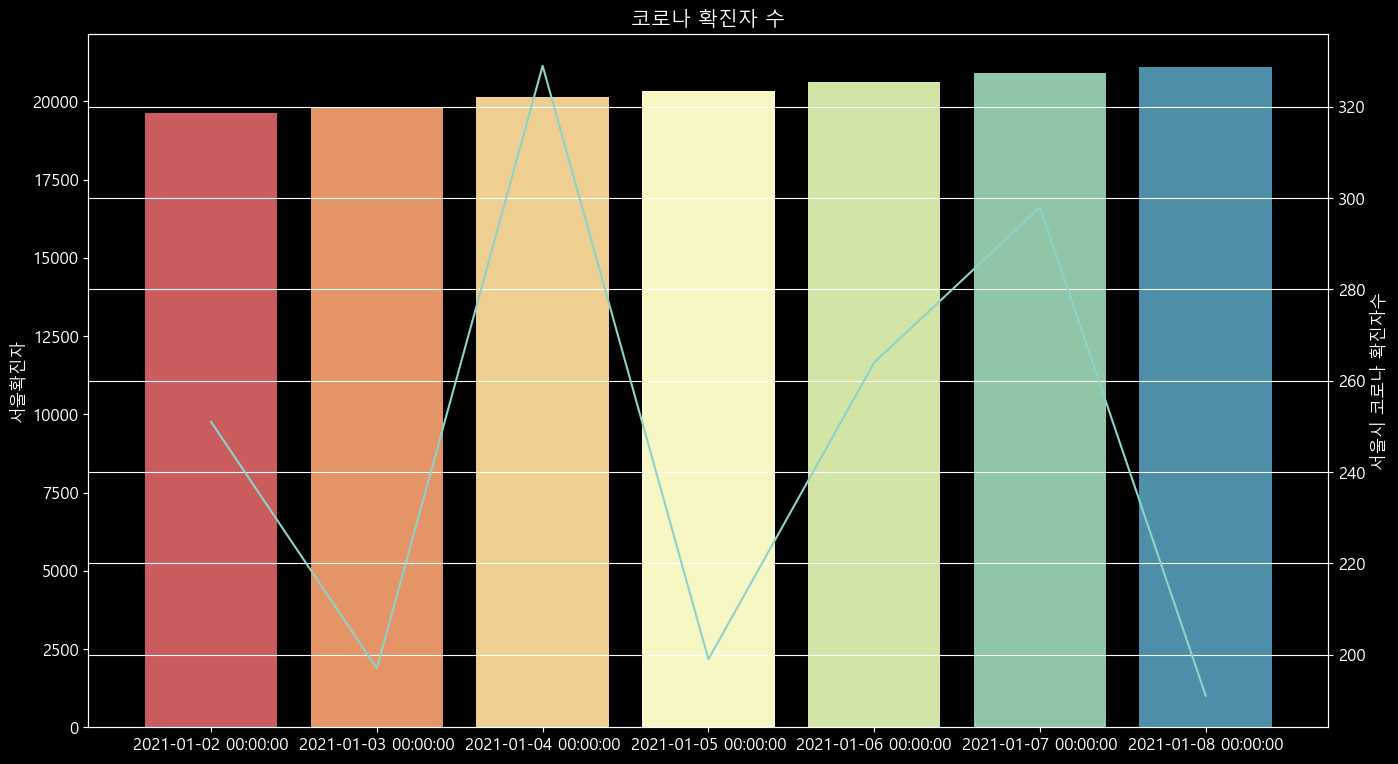

In [217]:
# # 첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
fig, ax1 = plt.subplots(1,1,figsize=(16,9)) # 그래프 시작
ax2 = ax1.twinx() # ax1에 겹쳐지는 서브플롯 생성

x = list(range(0,len(df['서울시기준일'])))

# 그래프 그리기
sb.barplot(data=df, x = x, y='서울확진자',palette='Spectral',ax=ax1)
sb.lineplot(data=df, x = x, y='서울시일일확진',ax=ax2)

plt.title('코로나 확진자 수')
plt.xlabel('서울시 기준일')
plt.ylabel('서울시 코로나 확진자수')
plt.xticks(x,df['서울시기준일'])
plt.grid()
plt.show()
plt.close()



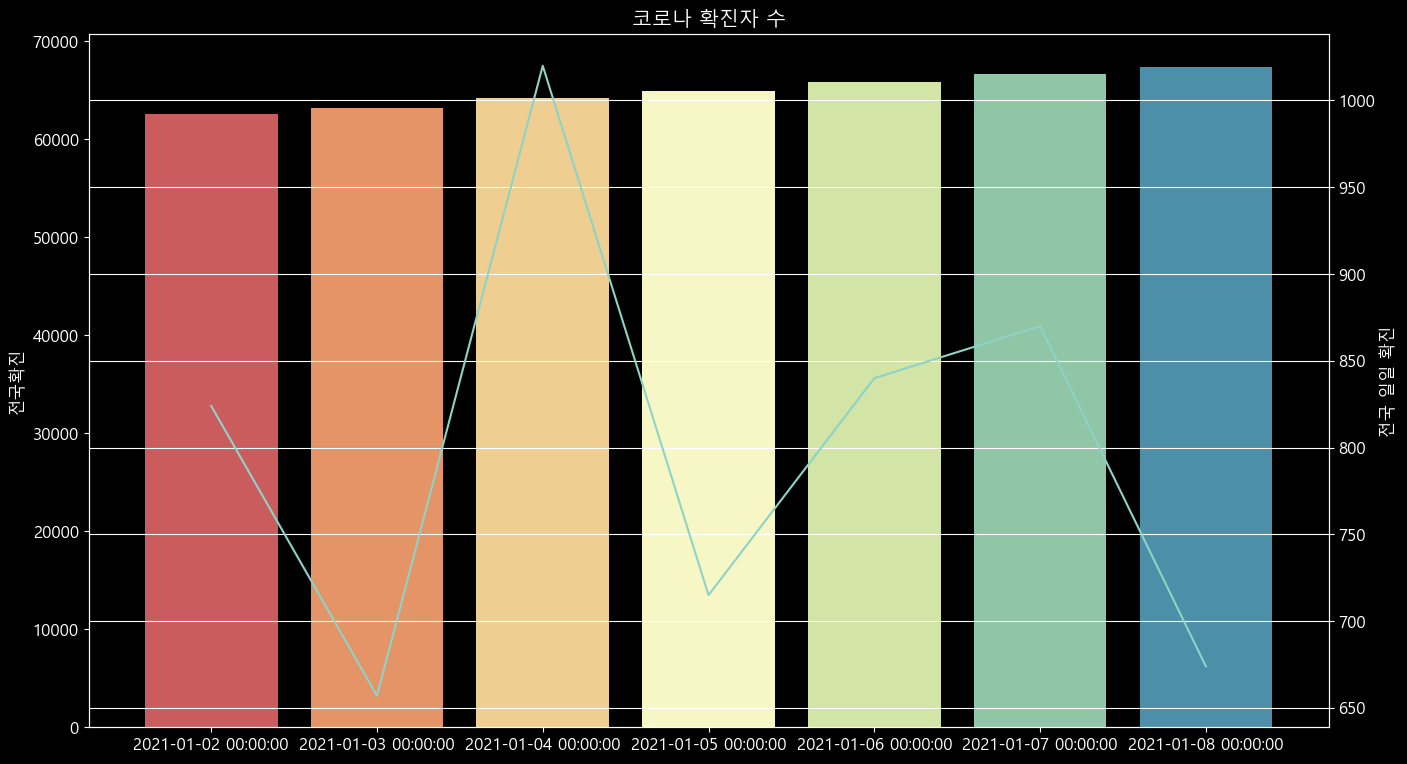

In [218]:
# 두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.


fig, ax = plt.subplots(1,2,figsize=(16,9)) # 그래프 시작
ax = ax1.twinx() # ax1에 겹쳐지는 서브플롯 생성

x = list(range(0,len(df['서울시기준일'])))

# 그래프 그리기
sb.barplot(data=df, x=x, y='전국확진',palette='Spectral',ax=ax1)
sb.lineplot(data=df, x=x, y='전국일일확진',ax=ax2)

plt.title('코로나 확진자 수')
plt.xlabel('서울시 기준일')
plt.ylabel('전국 일일 확진')
plt.xticks(x,df['서울시기준일'])
plt.grid()
plt.show()
plt.close()


AttributeError: 'Axes' object has no attribute 'twimx'

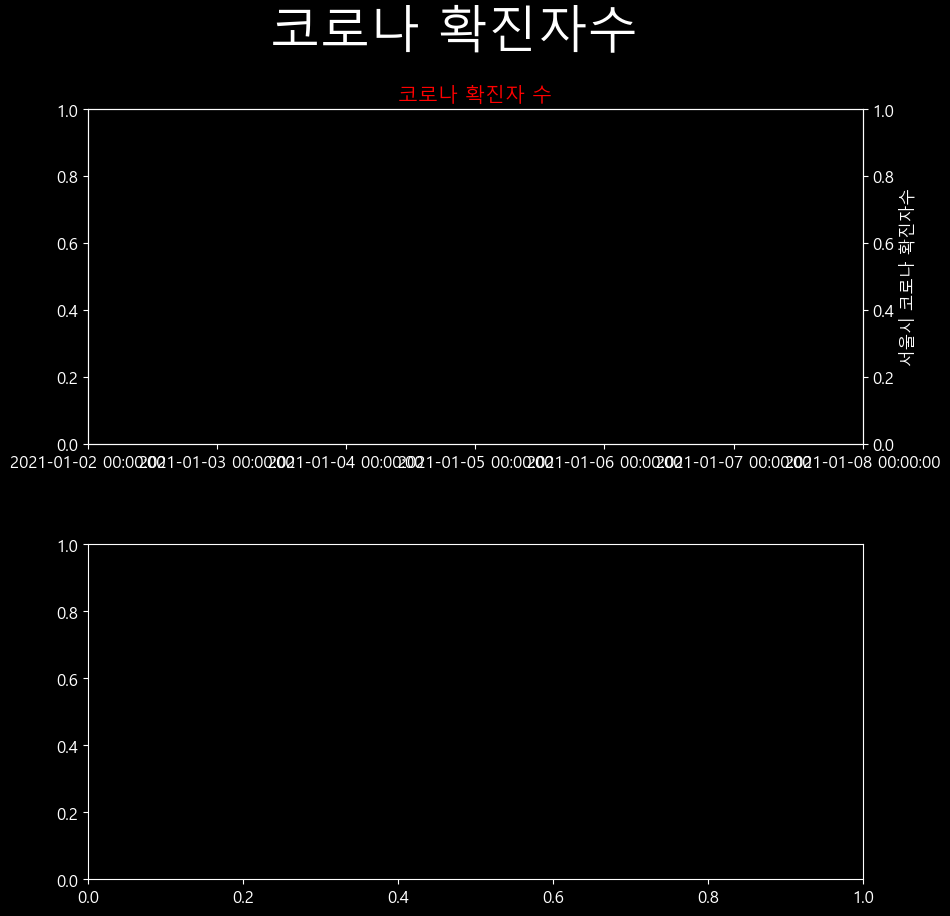

In [228]:
fig, ax = plt.subplots(2,1)

# 전체
fig.suptitle('코로나 확진자수 ', fontsize=36, color='#ffffff')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

# ------------------------------------------------------------------------
# ax[0]
ax_0=ax[0].twinx()
x = list(range(0,len(df['서울시기준일'])))

# 그래프 그리기
sb.barplot(data=df, x = x, y='서울확진자',palette='Spectral',ax=ax1)
sb.lineplot(data=df, x = x, y='서울시일일확진',ax=ax2)

ax_0.title.set_text('코로나 확진자 수')
ax_0.title.set_color('#ff0000')
ax_0.set(xlabel='서울시 기준일', ylabel='서울시 코로나 확진자수')
# -> 좌표 설정
ax_0.set_xticks(x)
# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax_0.set_xticklabels(df['서울시기준일'], fontsize=12, color='#ff0000')



# ax[1]
ax_1=ax[1].twimx()

# 그래프 그리기
sb.barplot(data=df, x=x, y='전국확진',palette='Spectral',ax=ax1)
sb.lineplot(data=df, x=x, y='전국일일확진',ax=ax2)

plt.title('코로나 확진자 수')
plt.xlabel('서울시 기준일')
plt.ylabel('전국 일일 확진')

ax_1.title.set_text('전국 코로나 확진자 수')
ax_1.title.set_color('#ffffff')
ax_1.set(xlabel='서울시 기준일', ylabel='전국 일일 확진')
# -> 좌표 설정
ax_1.set_xticks(x)
# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax_1.set_xticklabels(df['서울시기준일'], fontsize=12, color='#ff0000')


plt.show()
plt.close()
